In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc
import scipy.optimize as sco
import scipy.constants as c
from scipy.optimize import curve_fit as cf
import pandas as pd

In [2]:
# Brechungsindex
n=1.37927
# Laserwellenlänge
wavelen=532e-9
# Umrechnung ins grad Maß
gamma= np.pi/180 

In [17]:
def formfaktor(winkel,a,amp=1):
    #winkel=winkel+offset
    q=4*np.pi*n/wavelen * np.sin( winkel *gamma /2)
    
    return 9 * ( np.sin(q*a) - (q*a)* np.cos(q*a) )**2 /  (q*a)**6 *amp

# Funktion funktioniert für yscale="log" bei ca. a=500nm

C:\Users\Gunther\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


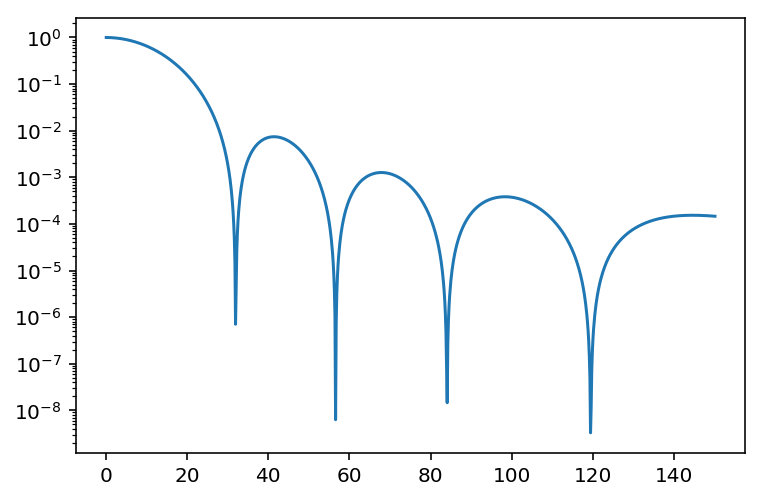

In [18]:
winkel=np.linspace(0,150,1000)
fig,ax=plt.subplots(dpi=144)
ax.plot(winkel, formfaktor(winkel,500e-9,amp=1))
ax.set(yscale="log");

[ -1.04748408e-07]


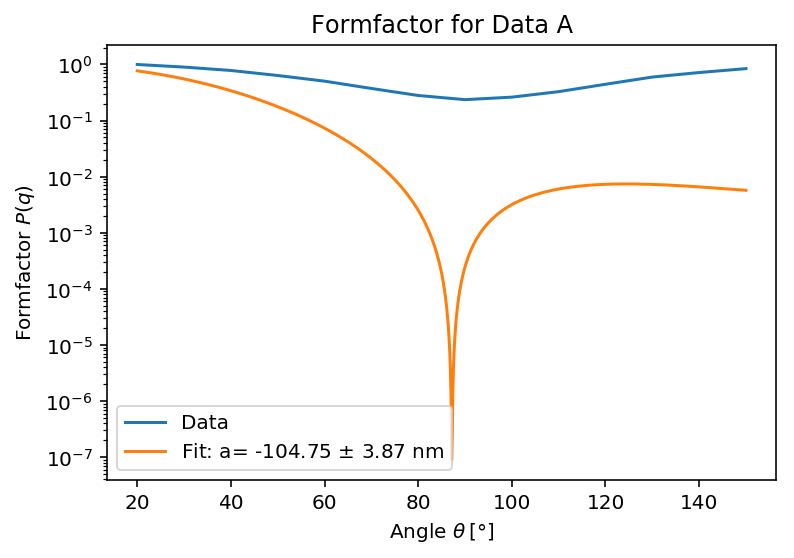

In [19]:
angles=[]
meanI=[]

for x in range(2,16):
    name="Data/A/{}.ASC".format(x*10)
    angles.append(x*10)
    data=np.genfromtxt(name,skip_header=16,delimiter="\t",filling_values=-1,comments="\"")
    I=data[183:,1]
    meanI.append(np.mean(I) * np.sin(gamma*x*10)) # Winkelkorrektur

meanI=[y/np.max(meanI) for y in meanI] # Normierung auf die größte Intensität

stop=10

popt,pcov=cf(formfaktor, angles[:stop], meanI[:stop], p0=(500e-9))
perr = np.sqrt(np.diag(pcov))
print(popt)

q=np.linspace(angles[0],angles[-1],1000)

fig,ax=plt.subplots(dpi=144)
ax.plot(angles, meanI ,label="Data")
ax.plot(q, formfaktor(q,200e-9) ,label="Fit: a= {:.2f} $\pm$ {:.2f} nm".format(popt[0]*1e9,perr[0]*1e9))
ax.set(xlabel=r"Angle $\theta \: [°]$", ylabel="Formfactor $P(q)$", title="Formfactor for Data A",yscale="log")
ax.legend();

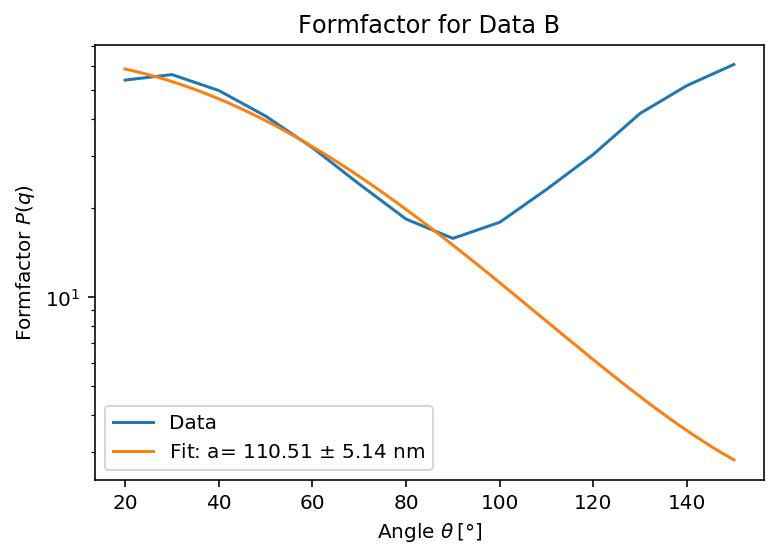

In [20]:
angles=[]
meanI=[]

for x in range(2,16):
    name="Data/B/{}.ASC".format(x*10)
    angles.append(x*10)
    data=np.genfromtxt(name,skip_header=16,delimiter="\t",filling_values=-1,comments="\"")
    I=data[183:,1]
    meanI.append(np.mean(I) * np.sin(gamma*x*10)) # Winkelkorrektur
    
#meanI=[y/np.amax(meanI) for y in meanI] # Normierung auf die größte Intensität

stop=7

popt,pcov=cf(formfaktor, angles[:stop], meanI[:stop], p0=(100e-9,300))
perr = np.sqrt(np.diag(pcov))

q=np.linspace(angles[0],angles[-1],1000)

fig,ax=plt.subplots(dpi=144)
ax.plot(angles, meanI ,label="Data")
ax.plot(q, formfaktor(q,*popt) ,label="Fit: a= {:.2f} $\pm$ {:.2f} nm".format(popt[0]*1e9,perr[0]*1e9))
ax.set(xlabel=r"Angle $\theta \: [°]$", ylabel="Formfactor $P(q)$", title="Formfactor for Data B",yscale="log")
ax.legend();